In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.graphics.api import qqplot
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import statsmodels
from scipy import stats
from tabulate import tabulate
from itertools import product
import warnings
warnings.filterwarnings("ignore")

# Тест Дики Фуллера

In [126]:
source = pd.read_csv('data/nonst.csv')
X = source["pwi"].dropna()
X

0        1.000000
1        3.650000
2        5.183000
3        6.426920
4        7.455227
         ...     
73    4923.938000
74    4952.902000
75    4949.282000
76    4934.800000
77    4891.353000
Name: pwi, Length: 78, dtype: float64

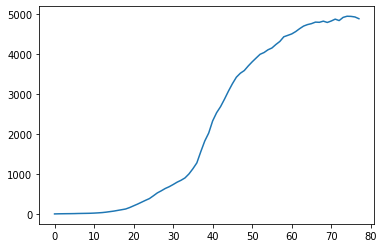

In [127]:
plt.plot(X)

In [128]:
result = adfuller(X, maxlag=None, regression='ct', autolag='t-stat', store=False, regresults=True)
result[3].__dict__['resols'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     13.61
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           1.70e-12
Time:                        02:16:53   Log-Likelihood:                -319.46
No. Observations:                  65   AIC:                             668.9
Df Residuals:                      50   BIC:                             701.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0376      0.016     -2.416      0.019      -0.069      -0.006
x2             0.5286      0.133      3.987      0.000       0.262       0.795
x3             0.2051      0.153      1.336      0.187      -0.103       0.513
x4             0.3008      0.156      1.930      0.059      -0.012       0.614
x5            -0.2232      0.161     -1.384      0.172      -0.547       0.101
x6             0.1496      0.170      0.879      0.383      -0.192       0.491
x7            -0.0062      0.179     -0.035      0.972      -0.366       0.354
x8             0.0715      0.180      0.397      0.693      -0.290       0.433
x9            -0.0929      0.182     -0.510      0.613      -0.459       0.273
x10           -0.0356      0.184     -0.194      0.847      -0.405       0.334
x11           -0.0748      0.181     -0.414      0.681      -0.438       0.289
x12           -0.0759      0.185     -0.411      0.683      -0.447       0.295
x13            0.3643      0.157      2.318      0.025       0.049       0.680
const         -5.8366     15.285     -0.382      0.704     -36.537      24.864
x14            2.9081      1.433      2.030      0.048       0.030       5.786
==============================================================================
Omnibus:                       11.802   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               13.075
Skew:                           0.830   Prob(JB):                      0.00145
Kurtosis:                       4.440   Cond. No.                     1.07e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [129]:
result

(-2.415800182202282,
 0.3712531830982564,
 {'1%': -4.105265484751935,
  '5%': -3.4803385352753753,
  '10%': -3.1678389485662266},
 <statsmodels.stats.diagnostic.ResultsStore at 0x154b0c360a0>)

# Сезонные модели

In [130]:
dist = pd.read_csv('data/season.csv')
season = dist["liquor"].dropna()
season

0       480
1       467
2       514
3       505
4       534
       ... 
331    1776
332    1743
333    1728
334    1769
335    2431
Name: liquor, Length: 336, dtype: int64

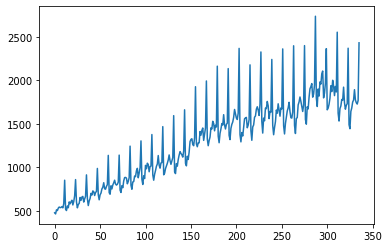

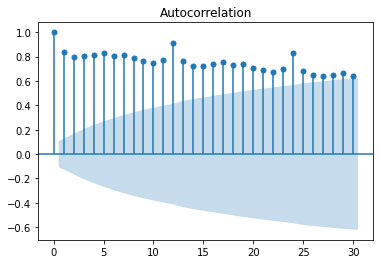

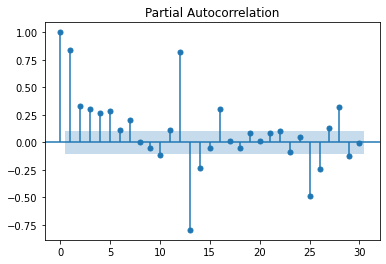

In [131]:
lagCount=30
plt.plot(season)
_ = plot_acf(season, lags=lagCount)
_ = plot_pacf(season, lags=lagCount)

# Удаление тренда

In [132]:
diff = list()
for i in range(1, len(season)):
	value = season[i] - season[i - 1]
	diff.append(value)

In [133]:
# plt.plot(Y, label='season')
# plt.plot(diff, label='not trend')
# plt.show()

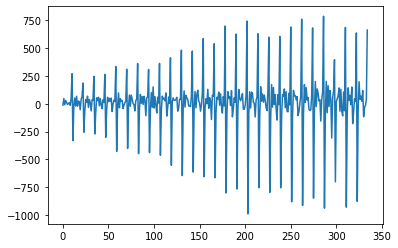

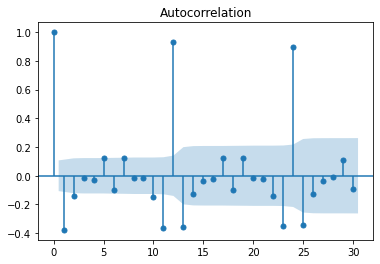

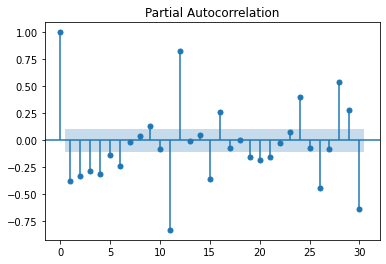

In [134]:
lagCountDiff = 30
plt.plot(diff)
_ = plot_acf(diff, lags=lagCountDiff)
_ = plot_pacf(diff, lags=lagCountDiff)

In [135]:

pSeason = [0, 1, 2, 3, 4]
qSeason = [0, 1, 2, 3, 4]
pOrder = [0, 1, 2, 10, 11]
qOrder = [0, 1, 2, 3, 4]
models = {}
# for i,j,k,l in product(pOrder, qOrder, pSeason, qSeason):
for i in pOrder:
    for j in qOrder:
        for k in pSeason:
            for l in qSeason:
                if ((i, j ,k, l) == (0, 0, 0, 0)):
                    continue
                arimax = SARIMAX(np.array(diff), order=(i, 0, j), seasonal_order=(k, 0, l, 12)).fit()
                pVal = arimax.pvalues
                if all(i <= 0.05 for i in pVal):
                    models[i, j ,k, l] = arimax
                    print(f'{arimax.summary()}')
print(f'{models.keys()}')


                                 SARIMAX Results                                  
Dep. Variable:                          y   No. Observations:                  335
Model:             SARIMAX(0, 0, [1], 12)   Log Likelihood               -2183.414
Date:                    Wed, 07 Apr 2021   AIC                           4370.827
Time:                            02:16:54   BIC                           4378.455
Sample:                                 0   HQIC                          4373.868
                                    - 335                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12       0.8144      0.018     44.399      0.000       0.778       0.850
sigma2      2.581e+04    974.341     26.487      0.000    2.39e+04    2.77e+04
Ljung-Box (L1) (Q): 

LinAlgError: LU decomposition error.

In [137]:
print(f'{len(models.keys())}')
# print(f'{models.values()}')

20


In [138]:
def standard_error(y, y_1, order):
    return np.sqrt(np.sum(np.square((y_1 - y))) / (len(y) - order))

In [139]:
def standard_error_model(train, test, model):
    k = max(model.model_orders['ar'], model.model_orders['ma'])
    standard_error_train = standard_error(train, model.predict(len(train)), k)
    standard_error_test = standard_error(test, model.forecast(len(test)), k)
    return standard_error_train, standard_error_test

In [140]:
m = {}

dict_se_train = {}
dict_se_test = {}
dict_aic = {}
dict_bic = {}
for name, model in models.items():
    tmp_dict = {}
    se_train, se_test = standard_error_model(season, diff, model)

    dict_se_train[name] = se_train
    dict_se_test[name] = se_test
    dict_aic[name] = model.aic
    dict_bic[name] = model.bic

    tmp_dict['SE Train'] = se_train
    tmp_dict['SE Test'] = se_test
    tmp_dict['AIC'] = model.aic
    tmp_dict['BIC'] = model.bic
    m[name] = tmp_dict

data = {
    'Model': list(m.keys()),
    'SE Train': list(dict_se_train.values()),
    'SE Test': list(dict_se_test.values()),
    'AIC': list(dict_aic.values()),
    'BIC': list(dict_bic.values())
}

df = pd.DataFrame.from_dict(data)
# df.set_index('Model')
df.sort_values("AIC")

,Model,SE Train,SE Test,AIC,BIC
13,"(0, 1, 1, 1)",1438.717452,449.716418,3623.268850,3638.525372
15,"(0, 1, 2, 0)",1449.120353,429.140142,3633.217660,3648.474182
14,"(0, 1, 1, 3)",1459.497533,474.420676,3658.464011,3681.348794
17,"(0, 1, 2, 2)",1445.847507,463.951235,3658.613597,3681.498380
5,"(0, 0, 3, 4)",1423.170825,442.669371,3681.866474,3712.379518
12,"(0, 1, 1, 0)",1429.532186,378.126852,3700.947077,3712.389468
6,"(0, 0, 4, 0)",1465.999927,441.658169,3718.156362,3737.227015
3,"(0, 0, 1, 1)",1436.230827,446.481891,3739.990057,3751.432449
4,"(0, 0, 2, 0)",1443.491158,422.342894,3755.282084,3766.724475
2,"(0, 0, 1, 0)",1427.493064,379.064548,3799.663699,3807.291960


SARIMAX(0, 0, 0, 1)


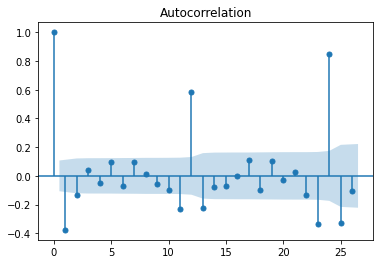

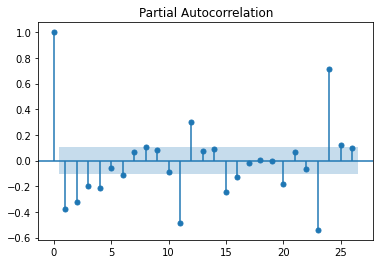

SARIMAX(0, 0, 0, 2)


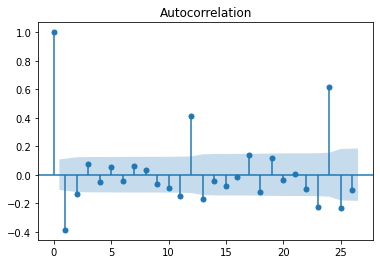

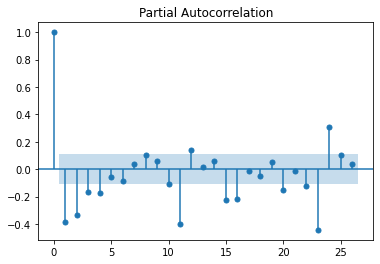

SARIMAX(0, 0, 1, 0)


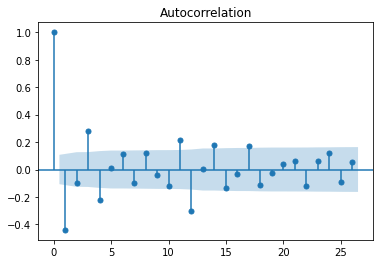

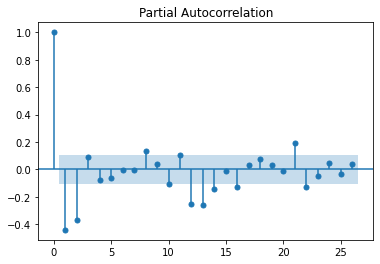

SARIMAX(0, 0, 1, 1)


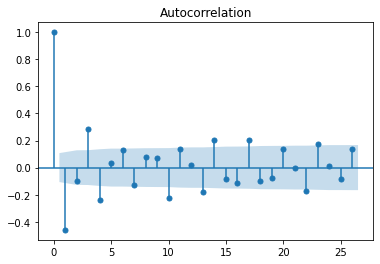

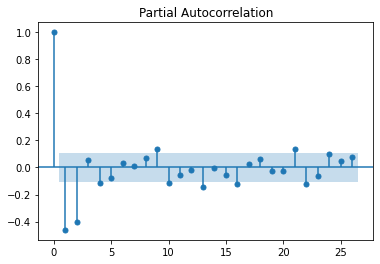

SARIMAX(0, 0, 2, 0)


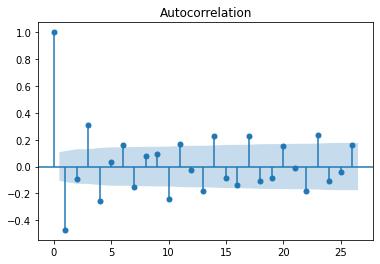

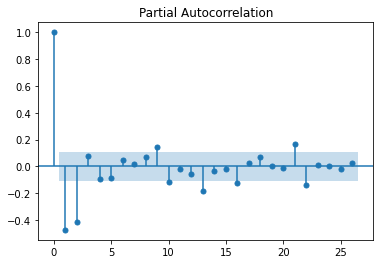

SARIMAX(0, 0, 3, 4)


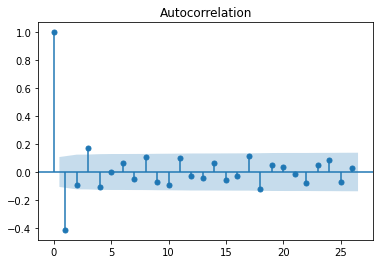

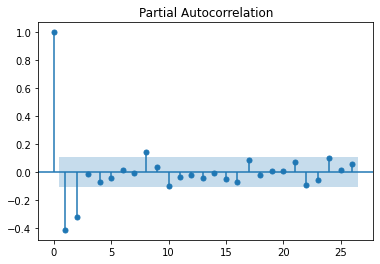

SARIMAX(0, 0, 4, 0)


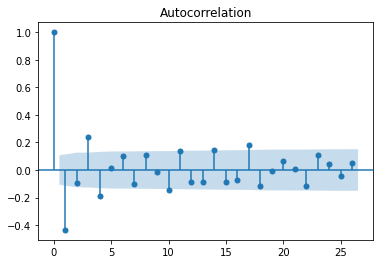

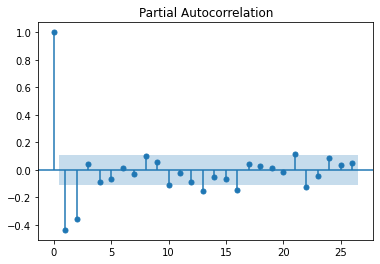

SARIMAX(0, 1, 0, 0)


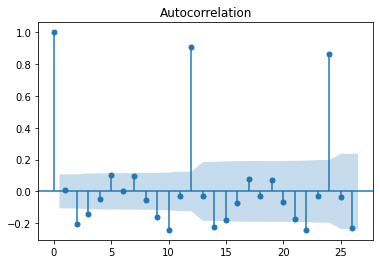

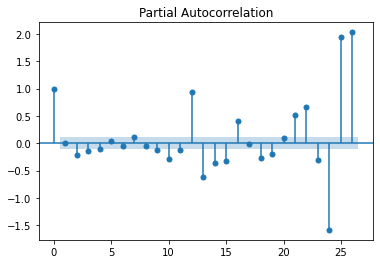

SARIMAX(0, 1, 0, 1)


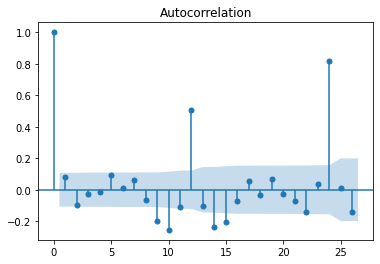

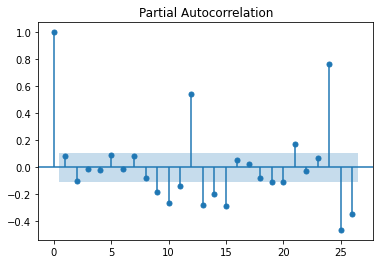

SARIMAX(0, 1, 0, 2)


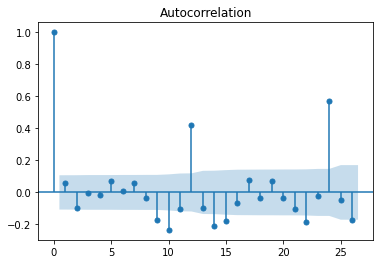

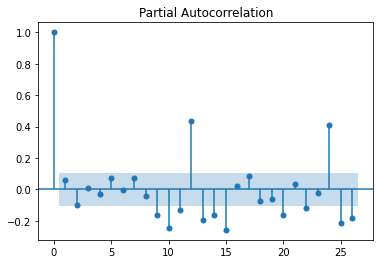

SARIMAX(0, 1, 0, 3)


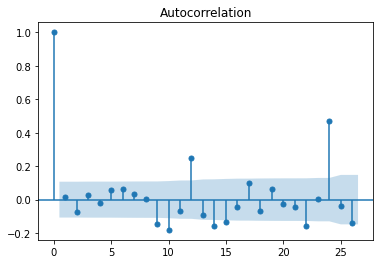

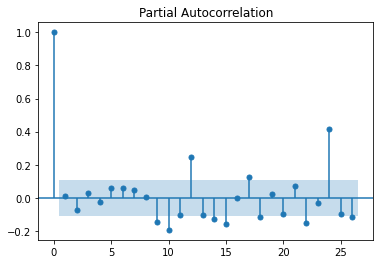

SARIMAX(0, 1, 0, 4)


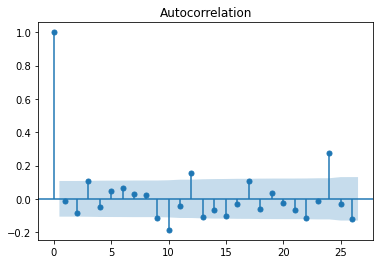

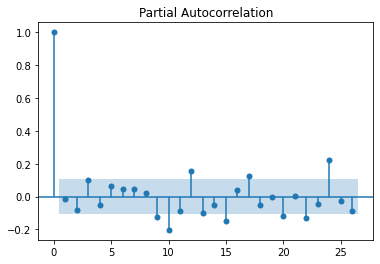

SARIMAX(0, 1, 1, 0)


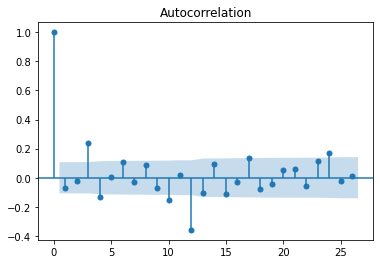

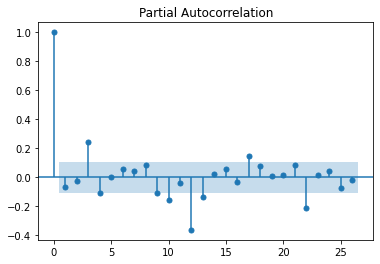

SARIMAX(0, 1, 1, 1)


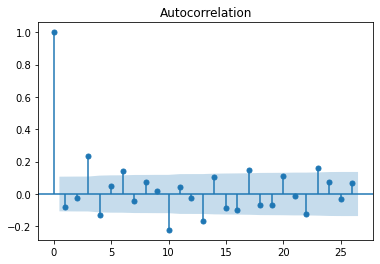

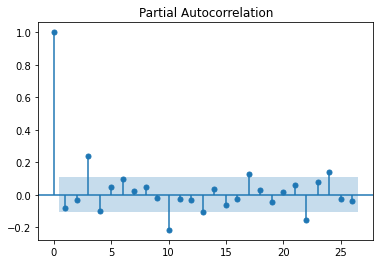

SARIMAX(0, 1, 1, 3)


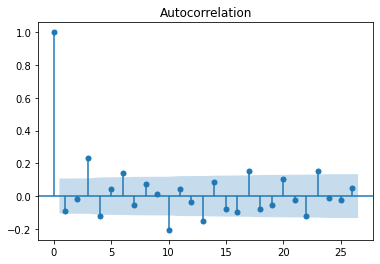

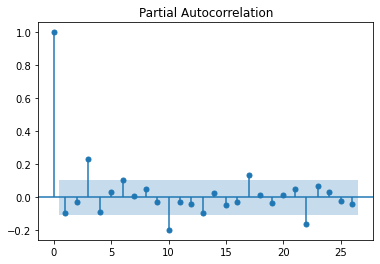

SARIMAX(0, 1, 2, 0)


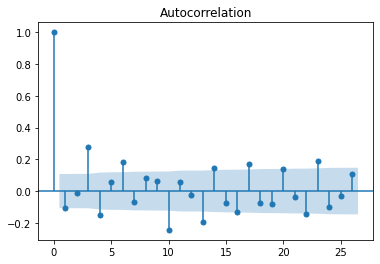

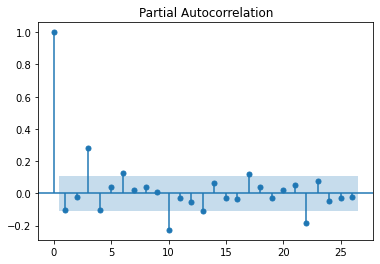

SARIMAX(0, 1, 2, 1)


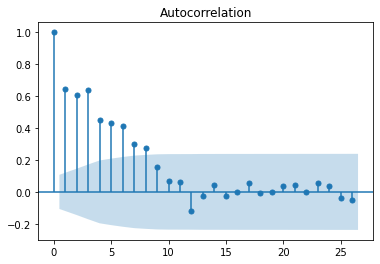

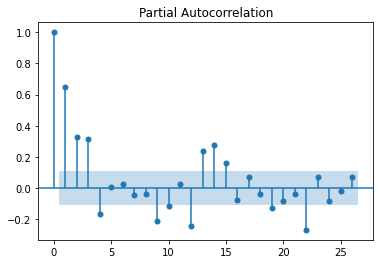

SARIMAX(0, 1, 2, 2)


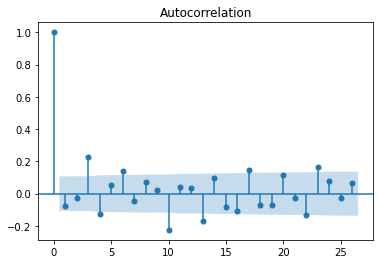

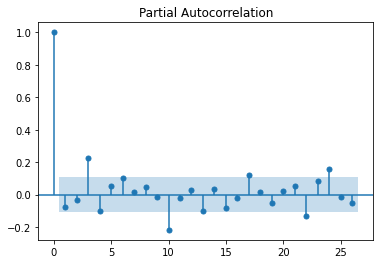

SARIMAX(0, 1, 2, 3)


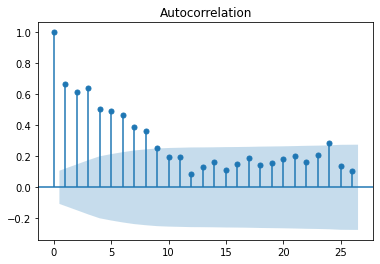

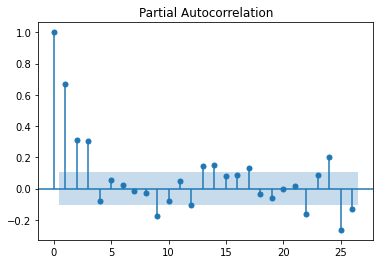

SARIMAX(0, 1, 2, 4)


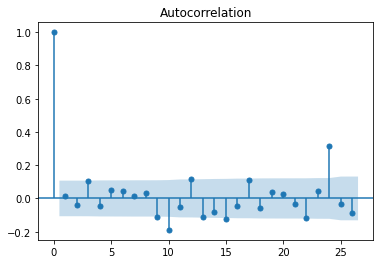

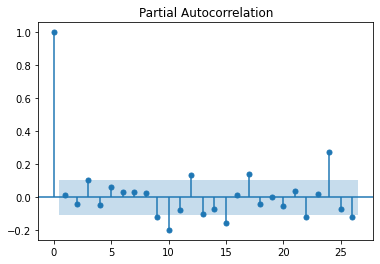

In [141]:
for name, model in models.items():
    print(f'SARIMAX{name}')
    _ = plot_acf(model.resid)
    _ = plot_pacf(model.resid)
    plt.show()
# bestArimax = SARIMAX(np.array(diff), order=(0, 0, 1), seasonal_order=(1, 0, 1, 12)).fit()
# # bestArimax.summary()
# _ = plot_acf(bestArimax.resid)
# _ = plot_pacf(bestArimax.resid)
# plt.show()